<a href="https://colab.research.google.com/github/MaVietHa-datascience/Ha_Portfolio/blob/main/classification_with_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [126]:
titanic = sns.load_dataset('titanic')

In [127]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**1. DEAL WITH MISSING VALUES**

In [128]:
# Calculate number of missing values

for feature in titanic.columns:
  print(feature, np.round(titanic[feature].isnull().sum() / len(titanic[feature])*100, 3), '% missing values')

survived 0.0 % missing values
pclass 0.0 % missing values
sex 0.0 % missing values
age 19.865 % missing values
sibsp 0.0 % missing values
parch 0.0 % missing values
fare 0.0 % missing values
embarked 0.224 % missing values
class 0.0 % missing values
who 0.0 % missing values
adult_male 0.0 % missing values
deck 77.217 % missing values
embark_town 0.224 % missing values
alive 0.0 % missing values
alone 0.0 % missing values


In [129]:
# Fill categorical missing value
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')
titanic['deck'] = titanic['deck'].cat.add_categories('no_deck')
titanic['deck'] = titanic['deck'].fillna('no_deck')

In [130]:
# Group age with who, sibsp, parch feature and fill missing value with mean of each group
titanic.groupby(['who','sibsp', 'parch'])['age'].agg(lambda x:x.isnull().sum()/len(x))
filler = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age'] = filler

<ipython-input-130-7012a8074306>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filler = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))


In [131]:
# Age still hase missing values some group has no value to calculate mean. So I group age by sibsp and parch
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])
filler = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-131-ca9c64a18c59>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filler = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))


In [132]:
# Last missing values
titanic[titanic['age'].isnull()]
filler = titanic.groupby(['adult_male'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age'] = filler

<ipython-input-132-68492f9dee02>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filler = titanic.groupby(['adult_male'])['age'].apply(lambda x: x.fillna(x.mean()))


**2. FEATURE ENGINEERING**

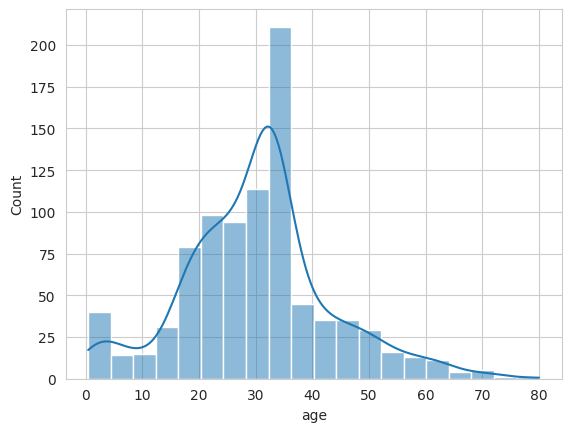

In [133]:
# Feature engineering with numerical value
sns.histplot(data= titanic, x = 'age', kde = True, bins = 20)
age_group = [0,15,25,45,60,70,100]
titanic['age_group'] = pd.cut(titanic['age'], bins = age_group)
titanic['log_fare'] = np.log1p(titanic['fare'])

In [134]:
# Categorical feature: ['sex', 'adult male', 'alone']
titanic['gender'] = titanic['sex'].map({'male':0, 'female':1})
titanic['adult_male'] = titanic['adult_male'].astype(int)
titanic['alone'] = titanic['alone'].astype(int)


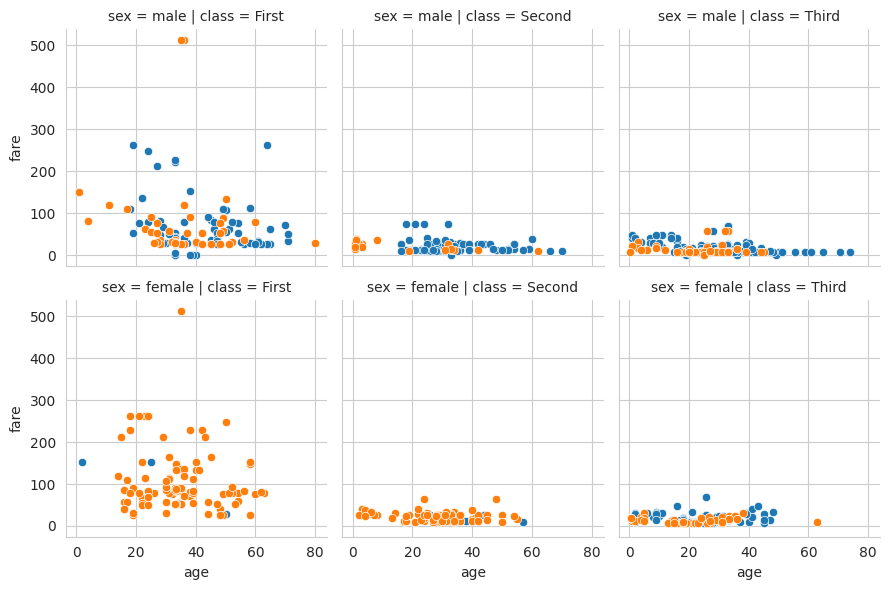

In [135]:
grid = sns.FacetGrid(data = titanic, row ='sex', col = 'class', hue ='survived')
grid.map(sns.scatterplot,'age', 'fare')

In [136]:
# Create new feature: female_class
filter1 = titanic['gender'] == 1
filter2 = titanic['class'].isin(['First', 'Second'])
titanic['female_class'] = (filter1 & filter2).astype(int)
titanic['female_class']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: female_class, Length: 891, dtype: int64

In [137]:
# One hot encoding
encoded = pd.get_dummies(titanic[['deck', 'embark_town', 'class', 'age_group', 'who']])
titanic = titanic.join(encoded)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   sex                      891 non-null    object  
 3   age                      891 non-null    float64 
 4   sibsp                    891 non-null    int64   
 5   parch                    891 non-null    int64   
 6   fare                     891 non-null    float64 
 7   embarked                 889 non-null    object  
 8   class                    891 non-null    category
 9   who                      891 non-null    object  
 10  adult_male               891 non-null    int64   
 11  deck                     891 non-null    category
 12  embark_town              891 non-null    object  
 13  alive                    891 non-null    object  
 14  alone     

In [138]:
# Data to train
data = titanic.drop(columns = ['deck', 'embarked', 'who', 'class', 'age_group', 'embark_town', 'sex' ])
data = data.drop(columns = ['fare', 'alive'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   adult_male               891 non-null    int64  
 6   alone                    891 non-null    int64  
 7   log_fare                 891 non-null    float64
 8   gender                   891 non-null    int64  
 9   female_class             891 non-null    int64  
 10  deck_A                   891 non-null    uint8  
 11  deck_B                   891 non-null    uint8  
 12  deck_C                   891 non-null    uint8  
 13  deck_D                   891 non-null    uint8  
 14  deck_E                   8

**3. TRAINING MODELS**

3.1 Prediction with DecisionTreeClassifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [140]:
X, y = data.drop(columns = ['survived']), data['survived']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =90)

In [141]:
# Choose depth for tree
n_features = len(x_train.columns)
tree = DecisionTreeClassifier(max_depth =round(np.log2(n_features)), max_features = round(n_features/2))

In [142]:
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [143]:
# Evaluation
metrics.accuracy_score(y_test, y_pred)*100


82.0627802690583

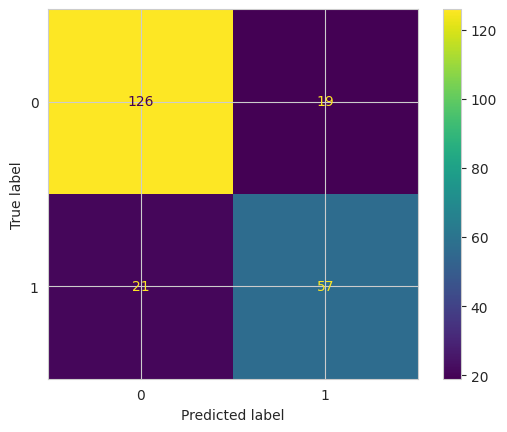

In [144]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

3.2 Prediction with RandomForestClassifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
forest = RandomForestClassifier(max_depth =round(np.log2(n_features)), max_features = round(n_features/2))

In [147]:
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [148]:
# Valuation
metrics.accuracy_score(y_test, y_pred)*100


81.61434977578476

In [149]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)


adult_male                 0.176609
female_class               0.166725
who_man                    0.158118
log_fare                   0.105231
age                        0.068988
gender                     0.051320
sibsp                      0.045551
pclass                     0.045289
class_Third                0.043576
who_woman                  0.024408
deck_no_deck               0.020149
deck_E                     0.013406
deck_D                     0.009959
parch                      0.007515
class_First                0.007353
embark_town_Southampton    0.007230
age_group_(0, 15]          0.006109
embark_town_Cherbourg      0.005674
age_group_(15, 25]         0.005565
who_child                  0.004783
age_group_(25, 45]         0.004599
class_Second               0.004208
deck_C                     0.003972
embark_town_Queenstown     0.003933
alone                      0.002874
age_group_(60, 70]         0.002416
age_group_(45, 60]         0.001854
deck_B                     0